In [23]:
import os
import sys
import glob
import csv

import numpy as np
import matplotlib.pyplot as plt

In [24]:
print('CSV Paths:')
glob.glob('./*.csv')

CSV Paths:


['./run-fit_UNet_Zero_Pad-512-BSCCE2_train-tag-epoch_IoU_Class0_Background.csv',
 './run-fit_UNet_Zero_Pad-512-BSCCE2_train-tag-epoch_IoU_Class1_Gray_Matter.csv',
 './run-fit_UNet_Zero_Pad-512-BSCCE2_train-tag-epoch_IoU_Class2_White_Matter.csv',
 './run-fit_UNet_Zero_Pad-512-BSCCE2_train-tag-epoch_IoU_Mean.csv',
 './run-fit_UNet_Zero_Pad-512-BSCCE2_validation-tag-epoch_IoU_Class0_Background.csv',
 './run-fit_UNet_Zero_Pad-512-BSCCE2_validation-tag-epoch_IoU_Class1_Gray_Matter.csv',
 './run-fit_UNet_Zero_Pad-512-BSCCE2_validation-tag-epoch_IoU_Class2_White_Matter.csv',
 './run-fit_UNet_Zero_Pad-512-BSCCE2_validation-tag-epoch_IoU_Mean.csv',
 './run-fit_UNet_Zero_Pad_2019O-512-SCCE-retrain_20200613_124255_train-tag-epoch_IoU_Class0_Background.csv',
 './run-fit_UNet_Zero_Pad_2019O-512-SCCE-retrain_20200613_124255_train-tag-epoch_IoU_Class2_White_Matter.csv',
 './run-fit_UNet_Zero_Pad_2019O-512-SCCE-retrain_20200613_124255_train-tag-epoch_IoU_Mean.csv',
 './run-fit_UNet_Zero_Pad_2019O-512-

In [25]:
def read_tb_csv(csvfilepath: str):
    """Read a TensorBoard csv file and returns its content
        Inputs: 
            csvfilepath: csv file path
        Outputs: 
            wall_time : wall time since first step
            step : step numbers
            value : data values at each step
    """
    with open(csvfilepath, newline='') as csvfile:
        reader = csv.DictReader(csvfile)
        
        # Fieldnames: ['Wall time', 'Step', 'Value']
        # print(f'fieldnames: {reader.fieldnames}')
        
        wall_time, step, value = [], [], []
        for row in reader:
            wall_time.append(float(row['Wall time']))
            step.append(int(row['Step']))
            value.append(float(row['Value']))
            
    wall_time = np.array(wall_time)
    wall_time -= wall_time[0]
    
    return wall_time, step, value

In [26]:
### UNet_Zero_Pad_2019O-512-SCCE
### Combining retrain results of epoch IoU
_, step, value \
    = read_tb_csv('./run-fit_UNet_Zero_Pad_2019O-512-SCCE_train-tag-epoch_IoU_Class0_Background.csv')
_, step_re, value_re \
    = read_tb_csv('./run-fit_UNet_Zero_Pad_2019O-512-SCCE-retrain_20200613_124255_train-tag-epoch_IoU_Class0_Background.csv')
epoch_train_back = (step+step_re, value+value_re)

_, step, value \
    = read_tb_csv('./run-fit_UNet_Zero_Pad_2019O-512-SCCE_validation-tag-epoch_IoU_Class0_Background.csv')
_, step_re, value_re \
    = read_tb_csv('./run-fit_UNet_Zero_Pad_2019O-512-SCCE-retrain_20200613_124255_validation-tag-epoch_IoU_Class0_Background.csv')
epoch_val_back = (step+step_re, value+value_re)

_, step, value \
    = read_tb_csv('./run-fit_UNet_Zero_Pad_2019O-512-SCCE_train-tag-epoch_IoU_Class1_Gray_Matter.csv')
_, step_re, value_re \
    = read_tb_csv('./run-fit_UNet_Zero_Pad_2019O-512-SCCE-retrain_20200613_124255_train-tag-epoch_IoU_Class1_Gray_Matter.csv')
epoch_train_gray = (step+step_re, value+value_re)

_, step, value \
    = read_tb_csv('./run-fit_UNet_Zero_Pad_2019O-512-SCCE_validation-tag-epoch_IoU_Class1_Gray_Matter.csv')
_, step_re, value_re \
    = read_tb_csv('./run-fit_UNet_Zero_Pad_2019O-512-SCCE-retrain_20200613_124255_validation-tag-epoch_IoU_Class1_Gray_Matter.csv')
epoch_val_gray = (step+step_re, value+value_re)

_, step, value \
    = read_tb_csv('./run-fit_UNet_Zero_Pad_2019O-512-SCCE_train-tag-epoch_IoU_Class2_White_Matter.csv')
_, step_re, value_re \
    = read_tb_csv('./run-fit_UNet_Zero_Pad_2019O-512-SCCE-retrain_20200613_124255_train-tag-epoch_IoU_Class2_White_Matter.csv')
epoch_train_white = (step+step_re, value+value_re)

_, step, value \
    = read_tb_csv('./run-fit_UNet_Zero_Pad_2019O-512-SCCE_validation-tag-epoch_IoU_Class2_White_Matter.csv')
_, step_re, value_re \
    = read_tb_csv('./run-fit_UNet_Zero_Pad_2019O-512-SCCE-retrain_20200613_124255_validation-tag-epoch_IoU_Class2_White_Matter.csv')
epoch_val_white = (step+step_re, value+value_re)

_, step, value \
    = read_tb_csv('./run-fit_UNet_Zero_Pad_2019O-512-SCCE_train-tag-epoch_IoU_Mean.csv')
_, step_re, value_re \
    = read_tb_csv('./run-fit_UNet_Zero_Pad_2019O-512-SCCE-retrain_20200613_124255_train-tag-epoch_IoU_Mean.csv')
epoch_train_mean = (step+step_re, value+value_re)

_, step, value \
    = read_tb_csv('./run-fit_UNet_Zero_Pad_2019O-512-SCCE_validation-tag-epoch_IoU_Mean.csv')
_, step_re, value_re \
    = read_tb_csv('./run-fit_UNet_Zero_Pad_2019O-512-SCCE-retrain_20200613_124255_validation-tag-epoch_IoU_Mean.csv')
epoch_val_mean = (step+step_re, value+value_re)

In [27]:
### UNet_Zero_Pad-512-SCCE2
_, step, value \
    = read_tb_csv('./run-fit_UNet_Zero_Pad-512-BSCCE2_train-tag-epoch_IoU_Class0_Background.csv')
epoch_train_back_old = (step, value)

_, step, value \
    = read_tb_csv('./run-fit_UNet_Zero_Pad-512-BSCCE2_validation-tag-epoch_IoU_Class0_Background.csv')
epoch_val_back_old = (step, value)

_, step, value \
    = read_tb_csv('./run-fit_UNet_Zero_Pad-512-BSCCE2_train-tag-epoch_IoU_Class1_Gray_Matter.csv')
epoch_train_gray_old = (step, value)

_, step, value \
    = read_tb_csv('./run-fit_UNet_Zero_Pad-512-BSCCE2_validation-tag-epoch_IoU_Class1_Gray_Matter.csv')
epoch_val_gray_old = (step, value)

_, step, value \
    = read_tb_csv('./run-fit_UNet_Zero_Pad-512-BSCCE2_train-tag-epoch_IoU_Class2_White_Matter.csv')
epoch_train_white_old = (step, value)

_, step, value \
    = read_tb_csv('./run-fit_UNet_Zero_Pad-512-BSCCE2_validation-tag-epoch_IoU_Class2_White_Matter.csv')
epoch_val_white_old = (step, value)

_, step, value \
    = read_tb_csv('./run-fit_UNet_Zero_Pad-512-BSCCE2_train-tag-epoch_IoU_Mean.csv')
epoch_train_mean_old = (step, value)

_, step, value \
    = read_tb_csv('./run-fit_UNet_Zero_Pad-512-BSCCE2_validation-tag-epoch_IoU_Mean.csv')
epoch_val_mean_old = (step, value)

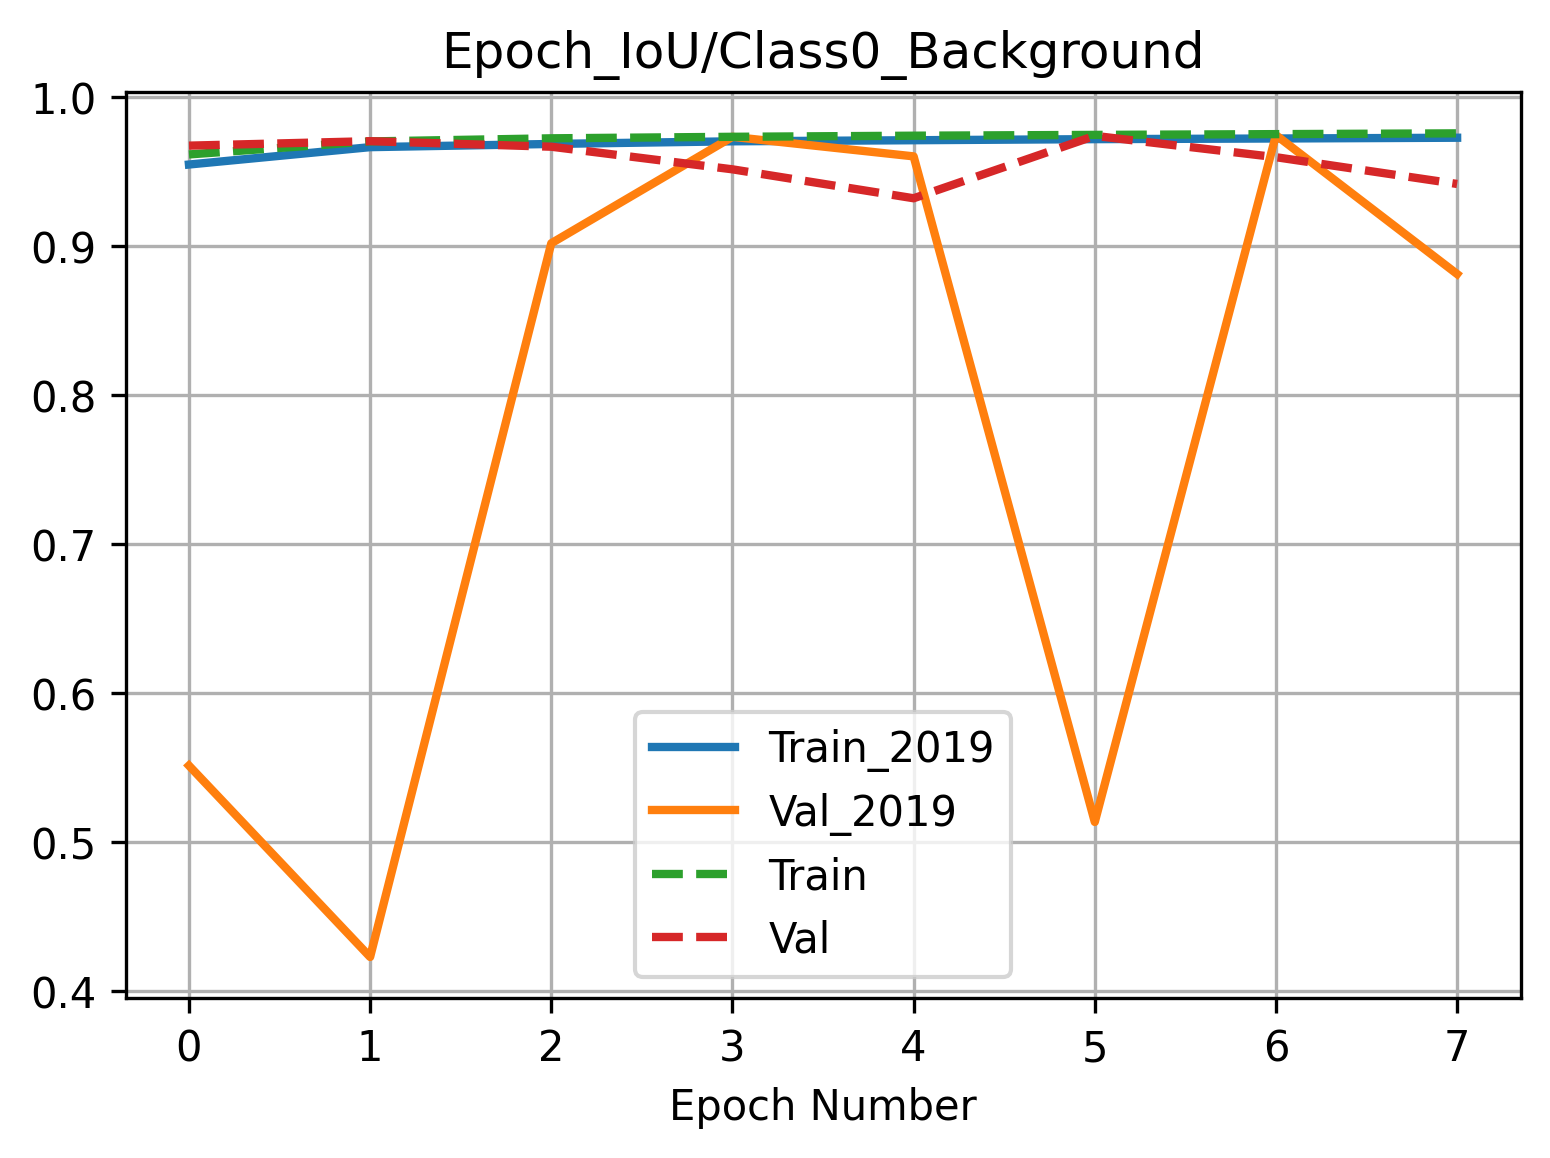

In [28]:
plt.figure(dpi=300)
plt.plot(epoch_train_back[0], epoch_train_back[1], '-', linewidth=2, label='Train_2019')
plt.plot(epoch_val_back[0], epoch_val_back[1], '-', linewidth=2, label='Val_2019')
plt.plot(epoch_train_back_old[0], epoch_train_back_old[1], '--', linewidth=2, label='Train')
plt.plot(epoch_val_back_old[0], epoch_val_back_old[1], '--', linewidth=2, label='Val')
plt.xlabel('Epoch Number')
plt.title('Epoch_IoU/Class0_Background')
plt.grid()
plt.legend()

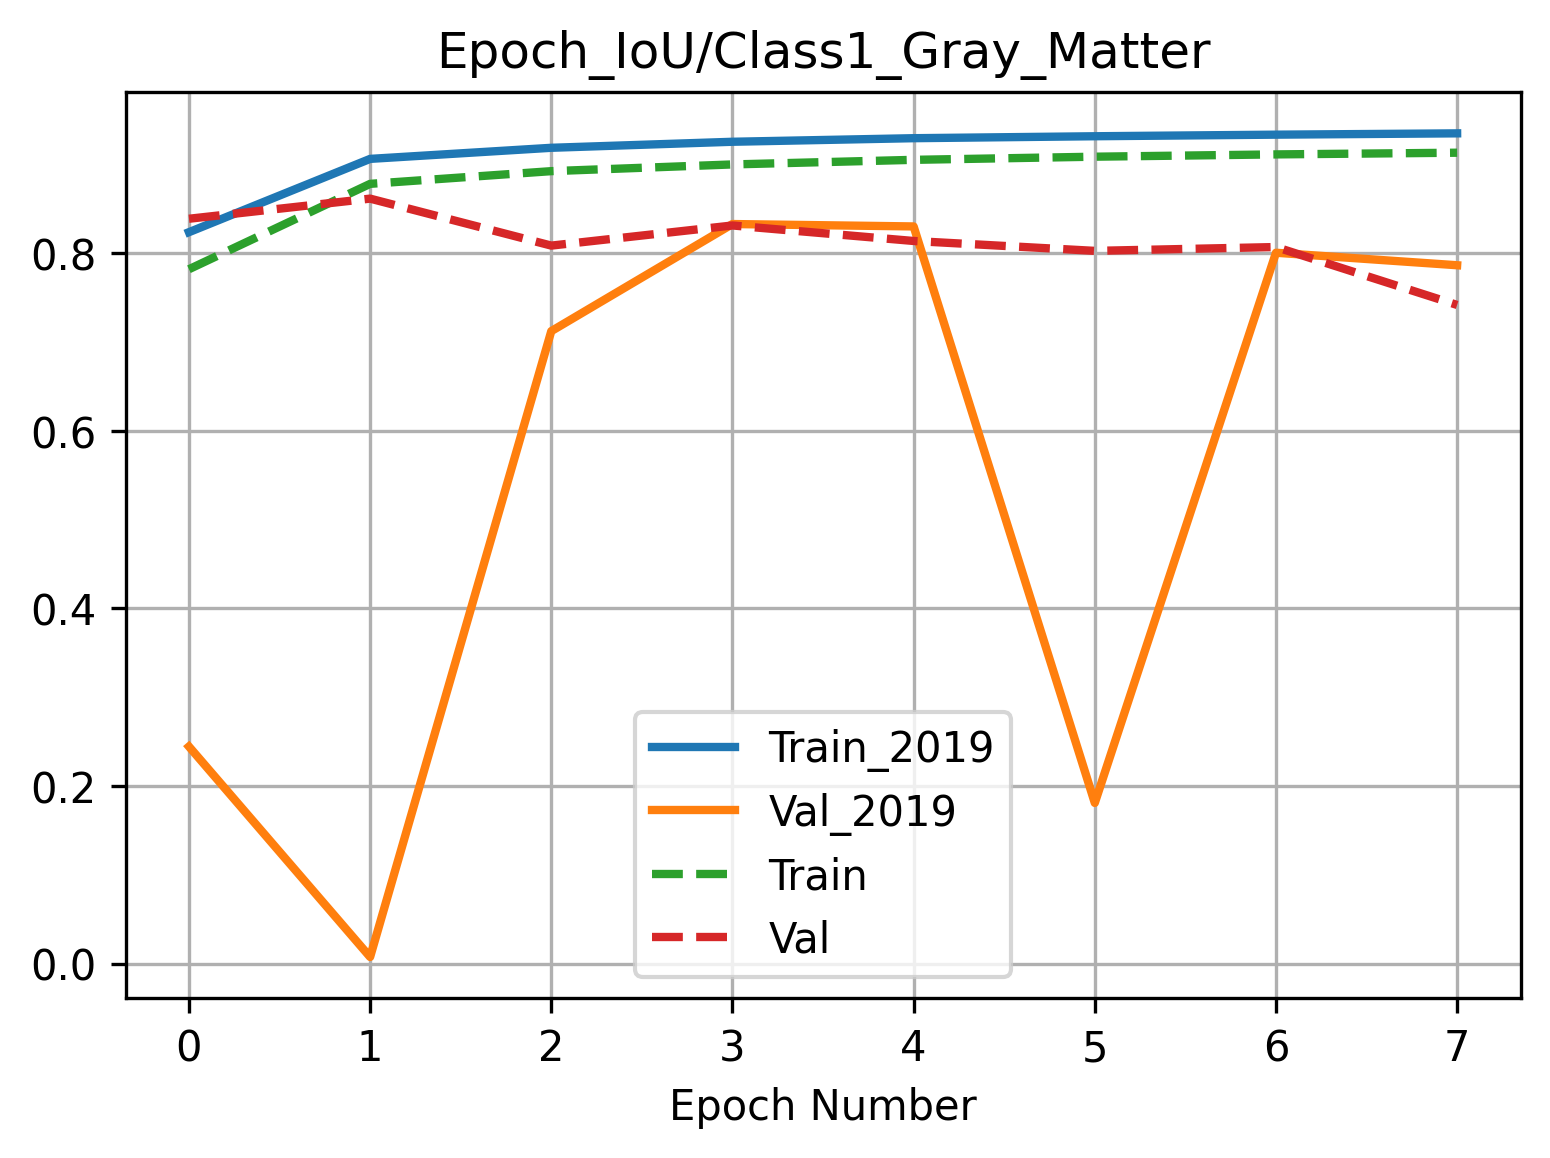

In [29]:
plt.figure(dpi=300)
plt.plot(epoch_train_gray[0], epoch_train_gray[1], '-', linewidth=2, label='Train_2019')
plt.plot(epoch_val_gray[0], epoch_val_gray[1], '-', linewidth=2, label='Val_2019')
plt.plot(epoch_train_gray_old[0], epoch_train_gray_old[1], '--', linewidth=2, label='Train')
plt.plot(epoch_val_gray_old[0], epoch_val_gray_old[1], '--', linewidth=2, label='Val')
plt.xlabel('Epoch Number')
plt.title('Epoch_IoU/Class1_Gray_Matter')
plt.grid()
plt.legend()

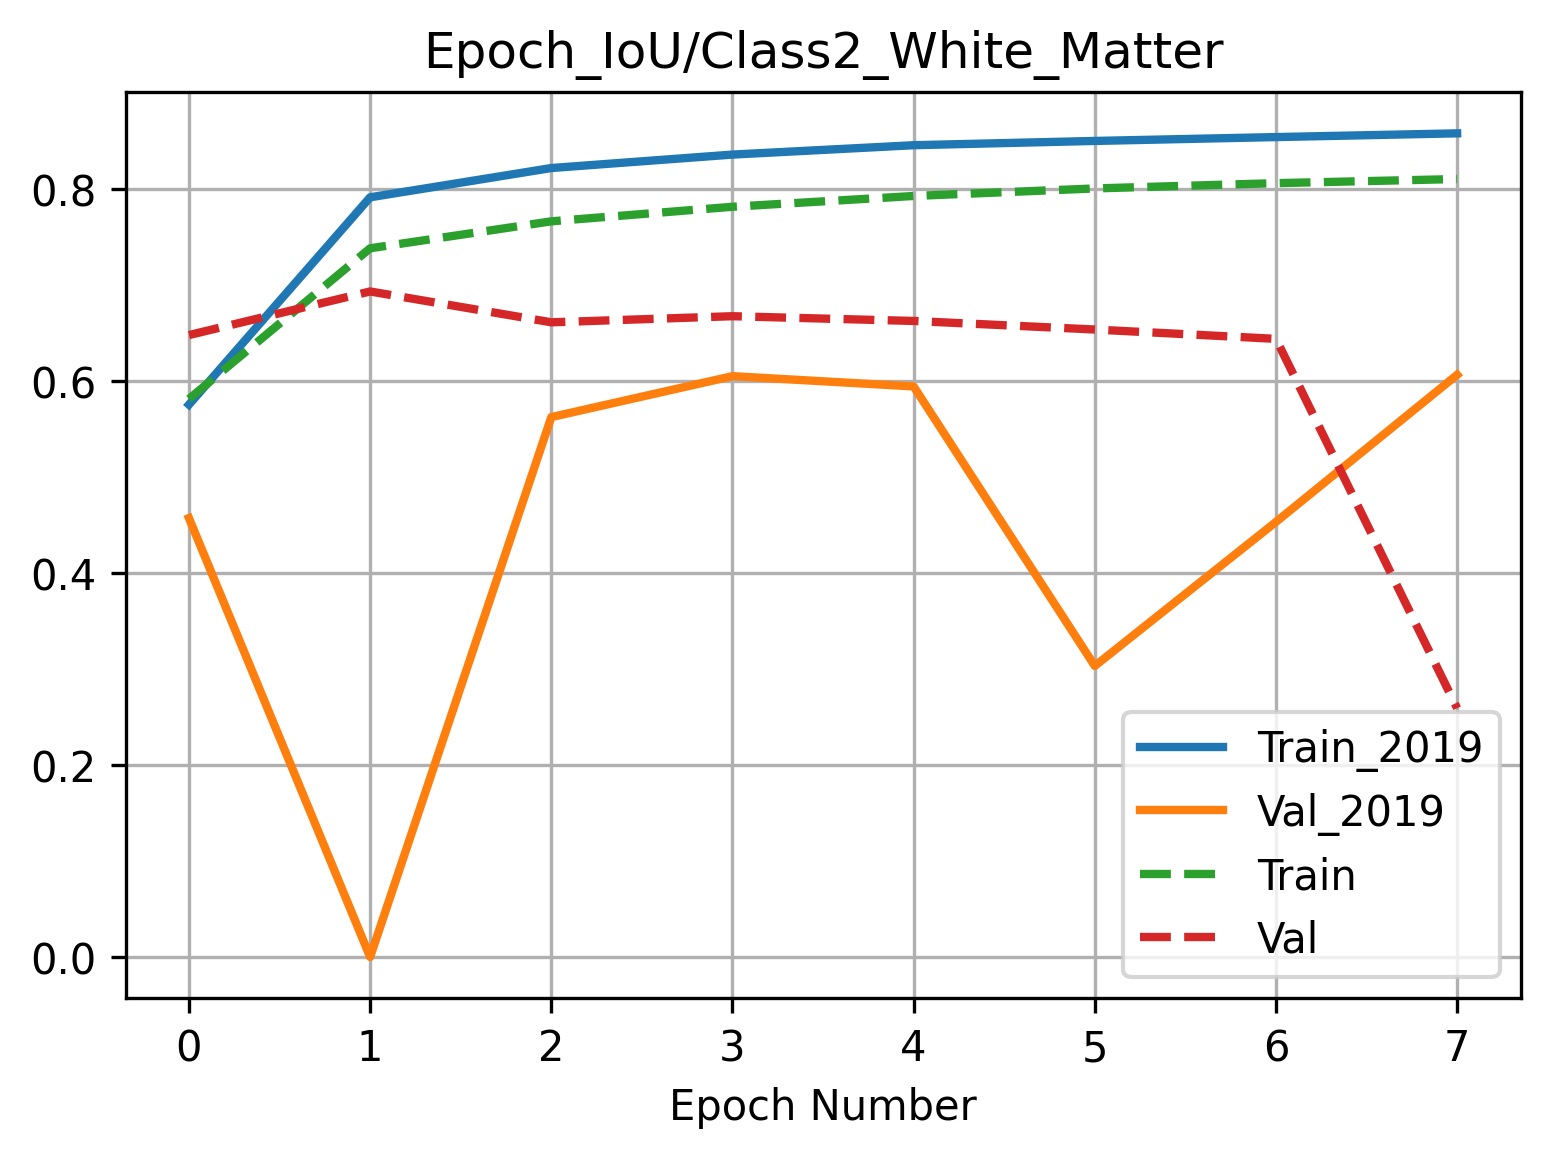

In [30]:
plt.figure(dpi=300)
plt.plot(epoch_train_white[0], epoch_train_white[1], '-', linewidth=2, label='Train_2019')
plt.plot(epoch_val_white[0], epoch_val_white[1], '-', linewidth=2, label='Val_2019')
plt.plot(epoch_train_white_old[0], epoch_train_white_old[1], '--', linewidth=2, label='Train')
plt.plot(epoch_val_white_old[0], epoch_val_white_old[1], '--', linewidth=2, label='Val')
plt.xlabel('Epoch Number')
plt.title('Epoch_IoU/Class2_White_Matter')
plt.grid()
plt.legend()

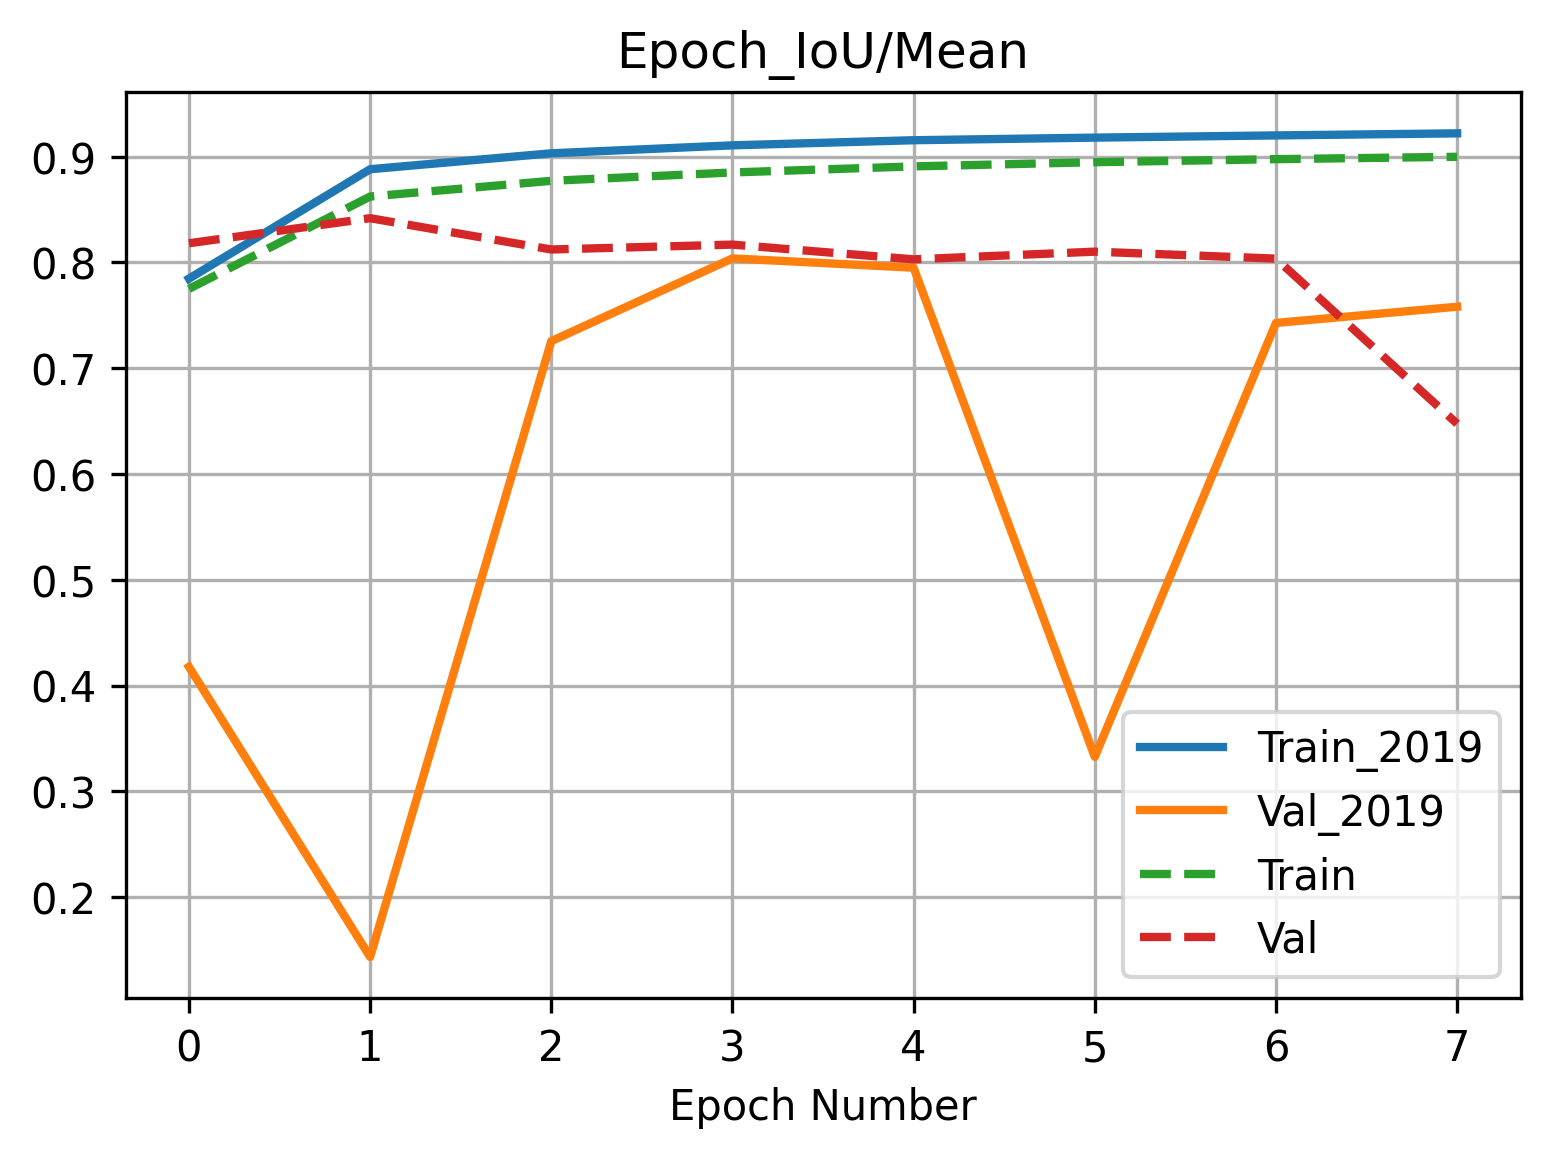

In [31]:
plt.figure(dpi=300)
plt.plot(epoch_train_mean[0], epoch_train_mean[1], '-', linewidth=2, label='Train_2019')
plt.plot(epoch_val_mean[0], epoch_val_mean[1], '-', linewidth=2, label='Val_2019')
plt.plot(epoch_train_mean_old[0], epoch_train_mean_old[1], '--', linewidth=2, label='Train')
plt.plot(epoch_val_mean_old[0], epoch_val_mean_old[1], '--', linewidth=2, label='Val')
plt.xlabel('Epoch Number')
plt.title('Epoch_IoU/Mean')
plt.grid()
plt.legend()